In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
  ## get Data 
btc_data=pd.read_csv('BTC-USD.csv')
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-06,10982.543945,11620.964844,10982.543945,11208.550781,11208.550781,21092024306
1,2019-07-07,11217.616211,11541.620117,11148.804688,11450.846680,11450.846680,19369044276
2,2019-07-08,11446.596680,12345.833008,11393.374023,12285.958008,12285.958008,23482551458
3,2019-07-09,12284.326172,12779.131836,12233.261719,12573.812500,12573.812500,28167921522
4,2019-07-10,12571.537109,13129.529297,11710.978516,12156.512695,12156.512695,33627574244


In [7]:
#filter only for Date and Open Prices to our dataframe
df=btc_data[['Date','Close']]
# set Month column as an index 
df.set_index('Date',inplace=True)
# convert index to datetime 
df.index=pd.to_datetime(df.index) 
# sort the datetime index 
df=df.sort_index()
df.head()

,Close
Date,
2019-07-06,11208.550781
2019-07-07,11450.846680
2019-07-08,12285.958008
2019-07-09,12573.812500
2019-07-10,12156.512695


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 367 entries, 2019-07-06 to 2020-07-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   367 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,367.0,8809.797931,1396.97143,4970.788086,7661.308594,8942.808594,9729.562988,12573.8125


In [9]:
#A variable for predicting 'n' days of the future
future_days = 30 

#Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Close']].shift(-future_days)

In [12]:
df.tail(31)

,Close,Prediction
Date,,
2020-06-06,9653.679688,9268.145508
2020-06-07,9758.852539,NaN
2020-06-08,9771.489258,NaN
2020-06-09,9795.700195,NaN
2020-06-10,9870.094727,NaN
2020-06-11,9321.781250,NaN
2020-06-12,9480.843750,NaN
2020-06-13,9475.277344,NaN
2020-06-14,9386.788086,NaN


In [13]:
# we have shifted up the prediction prices for 30 days. So we could predict thier prices after 

In [14]:

# Convert the dataframe to a numpy array and drop the prediction column
X = np.array(df.drop(['Prediction'],1))

#Remove the last 30 rows reserved for prediction(Features) 
X= X[:len(df)-future_days]
print(X)

[[11208.550781]
 [11450.84668 ]
 [12285.958008]
 [12573.8125  ]
 [12156.512695]
 [11358.662109]
 [11815.986328]
 [11392.378906]
 [10256.058594]
 [10895.089844]
 [ 9477.641602]
 [ 9693.802734]
 [10666.482422]
 [10530.732422]
 [10767.139648]
 [10599.105469]
 [10343.106445]
 [ 9900.767578]
 [ 9811.925781]
 [ 9911.841797]
 [ 9870.303711]
 [ 9477.677734]
 [ 9552.860352]
 [ 9519.145508]
 [ 9607.423828]
 [10085.62793 ]
 [10399.668945]
 [10518.174805]
 [10821.726563]
 [10970.18457 ]
 [11805.65332 ]
 [11478.168945]
 [11941.96875 ]
 [11966.407227]
 [11862.936523]
 [11354.024414]
 [11523.579102]
 [11382.616211]
 [10895.830078]
 [10051.704102]
 [10311.545898]
 [10374.338867]
 [10231.744141]
 [10345.810547]
 [10916.053711]
 [10763.232422]
 [10138.049805]
 [10131.055664]
 [10407.964844]
 [10159.960938]
 [10138.517578]
 [10370.820313]
 [10185.5     ]
 [ 9754.422852]
 [ 9510.200195]
 [ 9598.173828]
 [ 9630.664063]
 [ 9757.970703]
 [10346.760742]
 [10623.540039]
 [10594.493164]
 [10575.533203]
 [10353.

In [20]:
# Craete an array for prediction values(Labels) including future values to predict (NaN values )
# Convert the dataframe to a numpy array 
y = np.array(df['Prediction'])  
# Get all  y values except the last 'n' rows 
y = y[:-future_days] 
print(y)

[11805.65332  11478.168945 11941.96875  11966.407227 11862.936523
 11354.024414 11523.579102 11382.616211 10895.830078 10051.704102
 10311.545898 10374.338867 10231.744141 10345.810547 10916.053711
 10763.232422 10138.049805 10131.055664 10407.964844 10159.960938
 10138.517578 10370.820313 10185.5       9754.422852  9510.200195
  9598.173828  9630.664063  9757.970703 10346.760742 10623.540039
 10594.493164 10575.533203 10353.302734 10517.254883 10441.276367
 10334.974609 10115.975586 10178.37207  10410.126953 10360.546875
 10358.048828 10347.712891 10276.793945 10241.272461 10198.248047
 10266.415039 10181.641602 10019.716797 10070.392578  9729.324219
  8620.566406  8486.993164  8118.967773  8251.845703  8245.915039
  8104.185547  8293.868164  8343.276367  8393.041992  8259.992188
  8205.939453  8151.500488  7988.155762  8245.623047  8228.783203
  8595.740234  8586.473633  8321.756836  8336.555664  8321.005859
  8374.686523  8205.369141  8047.526855  8103.911133  7973.20752
  7988.5605

In [22]:
len(X),len(y)

(337, 337)

In [24]:
# Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [25]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((269, 1), (68, 1), (269,), (68,))

In [27]:
# Set prediction_days equal to the last 30 rows of the original data set from the price column
prediction_days = np.array(df['Close'])[-future_days:]
print(prediction_days)

[9758.852539 9771.489258 9795.700195 9870.094727 9321.78125  9480.84375
 9475.277344 9386.788086 9450.702148 9538.024414 9480.254883 9411.84082
 9288.018555 9332.34082  9303.629883 9648.717773 9629.658203 9313.610352
 9264.813477 9162.917969 9045.390625 9143.582031 9190.854492 9137.993164
 9228.325195 9123.410156 9087.303711 9132.488281 9073.942383 9268.145508]


In [76]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
# Create and train the Support Vector Regressor 
svr = SVR(kernel='rbf', C=1, gamma=0.001)
svr.fit(x_train, y_train) 
#Create the decision tree regressor model
dt=DecisionTreeRegressor()
#train the model 
dt.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [55]:
#predict on x_test 
# Print the predicted value
svr_preds = svr.predict(x_test)
print(svr_preds)
print('################\n')
#Print the actual values
print(y_test)

[8755.45155575 8751.914485   8751.1364271  8754.79027054 8752.69994608
 8751.48129962 8751.06925353 8755.05780344 8753.34592328 8753.9580957
 8747.91648259 8754.49809178 8753.30444605 8753.69728415 8752.82016785
 8753.52099473 8753.18869639 8752.55139303 8754.93486182 8752.82058424
 8749.99849728 8750.65587328 8755.36437353 8750.35652545 8755.8446652
 8751.72842571 8752.66280244 8753.40582864 8750.261837   8756.41191359
 8753.1589313  8756.53651917 8754.77525403 8754.43062341 8754.52911624
 8752.53108011 8751.57036663 8754.73026397 8753.41143589 8754.89988397
 8752.64291307 8752.99249113 8752.96560737 8752.44859471 8755.57794186
 8751.36281933 8755.28919411 8752.53779509 8754.31864622 8750.33069762
 8752.77248617 8753.25759737 8754.67239483 8752.22668044 8753.70600884
 8754.64374915 8753.6709188  8753.44018295 8754.65874258 8754.35946633
 8754.44462191 8753.40582864 8754.12410774 8754.22027573 8749.89678161
 8751.09245516 8749.12910784 8752.23910992]
################

[ 9412.612305  93

In [77]:
#predict on x_test 
# Print the predicted value
dt_preds = dt.predict(x_test)
print(dt_preds)
print('################\n')
#Print the actual values
print(y_test)

[10326.054688  6867.527344  7556.237793  9073.942383  8027.268066
  7257.665039  4970.788086 10410.126953  8293.868164 10517.254883
 10241.272461 10185.5       6867.527344 10360.546875  7911.430176
  9754.422852  7463.105957  7546.996582  9700.414063  7200.174316
  5392.314941  7879.071289  9461.058594  8321.005859  9522.981445
  9316.629883 10070.392578 11941.96875   6793.624512  7271.78125
  7569.936035  8756.430664  9613.423828  8909.954102  9162.917969
  8027.268066  9228.325195  9427.6875    9754.422852  9427.6875
  7116.804199  8027.268066  7546.996582  8309.286133  9055.526367
  7292.995117  9729.801758  8027.268066  9087.303711  7564.345215
  7200.174316  6859.083008  9341.705078  8309.286133  9754.422852
  9427.6875    7124.673828  9392.875     9341.705078  9800.636719
  9392.875    10334.974609  5225.629395  9377.013672  8321.005859
  7292.995117  7344.884277  8078.203125]
################

[ 9412.612305  9332.34082   9665.533203  6416.314941  9551.714844
  7189.424805  5200.

In [78]:
# Evaluate with Root Mean Squared Error 
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_svr=sqrt(mean_squared_error(svr_preds,y_test))
print("RMSE for SVR Equals == ",rmse_svr)
##################
rmse_dt=sqrt(mean_squared_error(dt_preds,y_test))
print("RMSE for DTR Equals == ",rmse_dt)

RMSE for SVR Equals ==  1342.1177260015957
RMSE for DTR Equals ==  1568.6723851173906


In [63]:
# Now ,let's predict the next 30 days
# Print the model predictions for the next 'n=30' days
svm_predictions = svr.predict(prediction_days.reshape(-1,1))
print(svm_predictions)

[8752.21719411 8752.20899983 8753.71971878 8752.49683402 8751.70519105
 8755.53892244 8755.9104128  8752.85645408 8755.50352274 8754.09345613
 8755.58504104 8753.17399615 8752.78920981 8751.26984655 8752.7454869
 8754.02000755 8753.29969505 8752.19503661 8750.73853794 8754.49417477
 8752.34193763 8753.80386078 8754.01751686 8753.64225998 8750.75718638
 8753.32246793 8752.11298127 8753.51056607 8751.72302394 8751.07240213]


C:\Users\hp\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


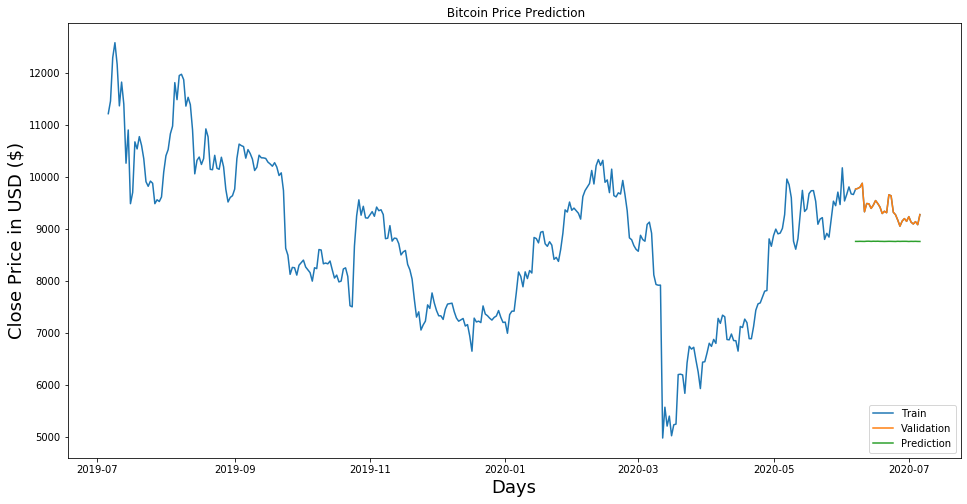

In [75]:
#Plot the data for Decision Tree Model 
valid =  df[X.shape[0]:]
valid['Predictions'] = svm_predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title(' Bitcoin Price Prediction')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price in USD ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Validation', 'Prediction' ], loc='lower right')
plt.show()

In [72]:
df_preds

0     8752.217194
1     8752.209000
2     8753.719719
3     8752.496834
4     8751.705191
5     8755.538922
6     8755.910413
7     8752.856454
8     8755.503523
9     8754.093456
10    8755.585041
11    8753.173996
12    8752.789210
13    8751.269847
14    8752.745487
15    8754.020008
16    8753.299695
17    8752.195037
18    8750.738538
19    8754.494175
20    8752.341938
21    8753.803861
22    8754.017517
23    8753.642260
24    8750.757186
25    8753.322468
26    8752.112981
27    8753.510566
28    8751.723024
29    8751.072402
dtype: float64